# Graph Maker for Mid-Term Data Structures and Algorithums


Author: Joshua Roberge

In [114]:
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uuid
from tqdm.notebook import tqdm


SAVE_LOCATION = "final_results.csv"
MAX_FIB = 500
MIN_FIB = 1

### Running and Gathering Results for C Implementation

In [126]:
def get_c_fib(start:int, end:int) -> pd.DataFrame:
    """
    Runs the C implementation of Fibonacci and and then writes the results to a CSV file.
    """
    results = []
    for i in range(start, end + 1):
        # Itterative
        result = subprocess.run(['../c_fib/main.out', '-a', '1','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.strip().split(","))

        # Dynamic
        result = subprocess.run(['../c_fib/main.out', '-a', '3','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.strip().split(","))

        # Recusive
        if i < 40:
            result = subprocess.run(['../c_fib/main.out', '-a', '2','-f',  str(i)], capture_output=True, text=True)
            results.append(result.stdout.strip().split(","))
    
    df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Implementation", "Time Elsaped"]
                  )
    df["Fibonacci Number"] = df["Fibonacci Number"].str.replace("f_", "").astype(int)

    return df



for i in tqdm(range(1, 5), desc="Processing Fibonacci Rounds for C"):
    df = get_c_fib(MIN_FIB, 30000)
    df["Round"] = uuid.uuid4().hex ## using this as a pimrary key
    df["Language"] = "C"
    df = df[["Round", "Language", "Fibonacci Number", "Implementation", "Time Elsaped"]]
    df.to_csv(SAVE_LOCATION,
              mode='a',
              index=False, 
              header=not pd.io.common.file_exists(SAVE_LOCATION))

Processing Fibonacci Rounds for C:   0%|          | 0/4 [00:00<?, ?it/s]

### Running and Gathering Results for Python Implementation

In [ ]:
def get_python_fib(start:int, end:int) -> pd.DataFrame:
    """
    Runs the C implementation of Fibonacci and and then writes the results to a CSV file.
    """
    results = []
    for i in range(start, end + 1):
        # Itterative
        result = subprocess.run(['python3', '../python_fib/main.py', '-a', '1','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.replace("\n", "").split(","))

        # Dynamic
        result = subprocess.run(['python3', '../python_fib/main.py', '-a', '3','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.replace("\n", "").split(","))

        # Recusive
        if i < 25:
            result = subprocess.run(['python3', '../python_fib/main.py', '-a', '2','-f',  str(i)], capture_output=True, text=True)
            results.append(result.stdout.replace("\n", "").split(","))
    
    df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Implementation", "Time Elsaped"]
                  )
    df["Fibonacci Number"] = df["Fibonacci Number"].str.replace("f_", "").astype(int)

    return df


for i in tqdm(range(1, 30), desc="Processing Fibonacci Rounds for C"):
    df = get_python_fib(MIN_FIB, 30000)
    df["Round"] = uuid.uuid4().hex ## using this as a pimrary key
    df["Language"] = "Python"
    df = df[["Round", "Language", "Fibonacci Number", "Implementation", "Time Elsaped"]]
    df.to_csv(SAVE_LOCATION,
              mode='a',
              index=False, 
              header=not pd.io.common.file_exists(SAVE_LOCATION))
    
    break

Processing Fibonacci Rounds for C:   0%|          | 0/29 [00:00<?, ?it/s]

# Make Graphs

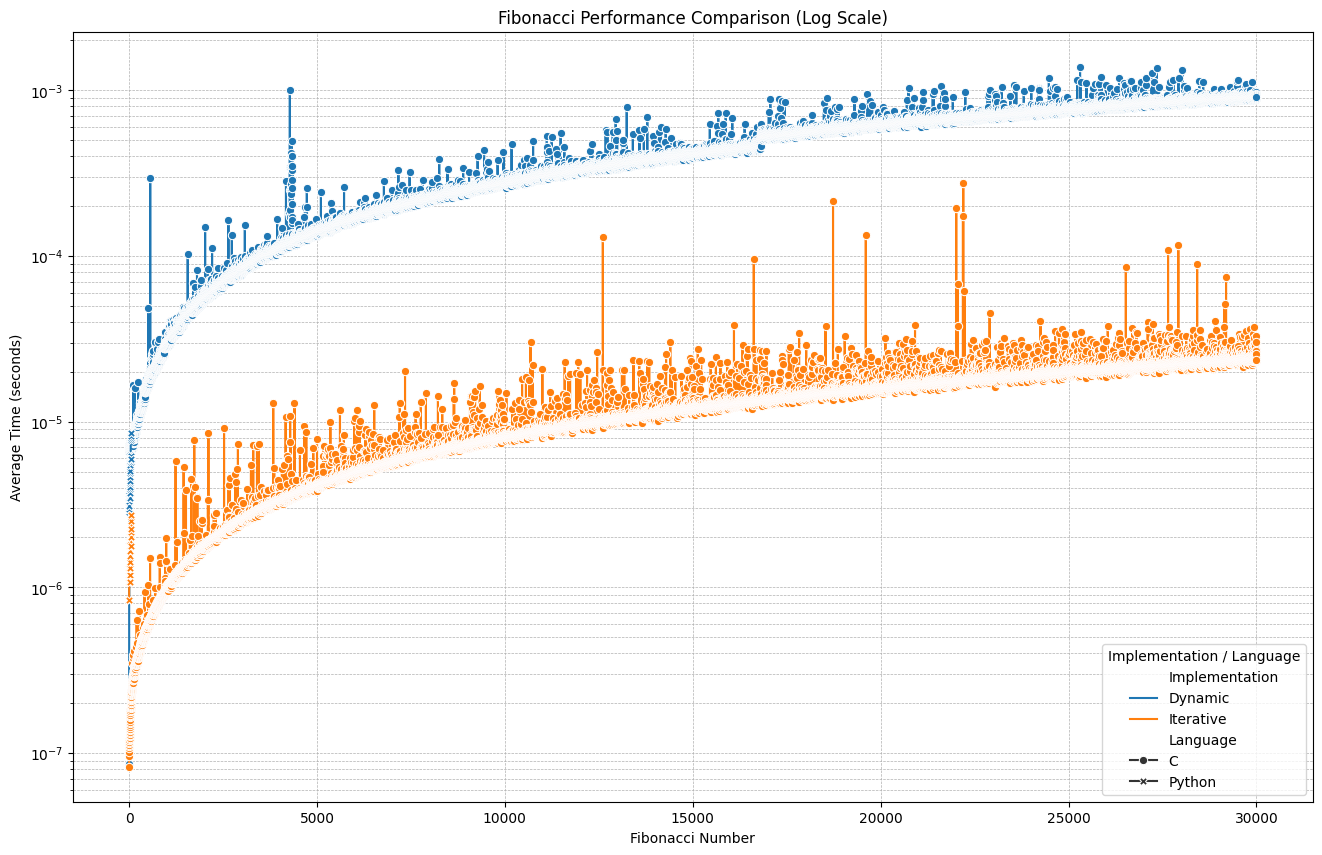

In [130]:
df = pd.read_csv(SAVE_LOCATION)

# df = df[df["Round"] == df["Round"].unique()[-5]]

df = df.rename(columns={"Time Elsaped": "Time (seconds)"})


df = df[(~df["Time (seconds)"].isna()) & (df["Time (seconds)"] > 0)]

df = (
    df
    .drop(columns=["Round"])
    .groupby(["Language", "Fibonacci Number", "Implementation"], as_index=False)
    .mean()
)

df = df[df["Implementation"] != "Recursive"]


plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x="Fibonacci Number", y="Time (seconds)", hue="Implementation", style="Language", markers=True, dashes=False)
plt.yscale("log")
plt.title("Fibonacci Performance Comparison (Log Scale)")
plt.xlabel("Fibonacci Number")
plt.ylabel("Average Time (seconds)")
plt.legend(title="Implementation / Language")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
#!/usr/bin/env python3


In [60]:
df = pd.read_csv(SAVE_LOCATION)

# df = (
# df
#   .drop(columns=["Round"])
#   .groupby(["Language", "Fibonacci Number"], as_index=False)
#   .mean()
#   .melt(id_vars=["Language", "Fibonacci Number"], var_name="Implementation", value_name="Time (seconds)")
# )

df

,Round,Language,Fibonacci Number,Itterative,Recrusive,Dynamic
0,6f9865161b7b42a9a3dfca165333ec59,C,f_1,9.300000e-08,4.400000e-08,4.300000e-08
1,6f9865161b7b42a9a3dfca165333ec59,C,f_2,8.400000e-08,1.050000e-07,9.069000e-06
2,6f9865161b7b42a9a3dfca165333ec59,C,f_3,1.020000e-07,1.270000e-07,7.065000e-06
3,6f9865161b7b42a9a3dfca165333ec59,C,f_4,1.030000e-07,1.490000e-07,6.204000e-06
4,6f9865161b7b42a9a3dfca165333ec59,C,f_5,1.100000e-07,2.510000e-07,8.472000e-06
...,...,...,...,...,...,...
5423,3055591ca8af499f875c68f4d7fa1807,C,f_88,2.650000e-07,-1.000000e+00,6.441000e-06
5424,3055591ca8af499f875c68f4d7fa1807,C,f_89,3.260000e-07,-1.000000e+00,7.524000e-06
5425,3055591ca8af499f875c68f4d7fa1807,C,f_90,2.350000e-07,-1.000000e+00,8.093000e-06
5426,3055591ca8af499f875c68f4d7fa1807,C,f_91,2.910000e-07,-1.000000e+00,7.238000e-06


Text(0.5, 0, 'Fibonacci Number')

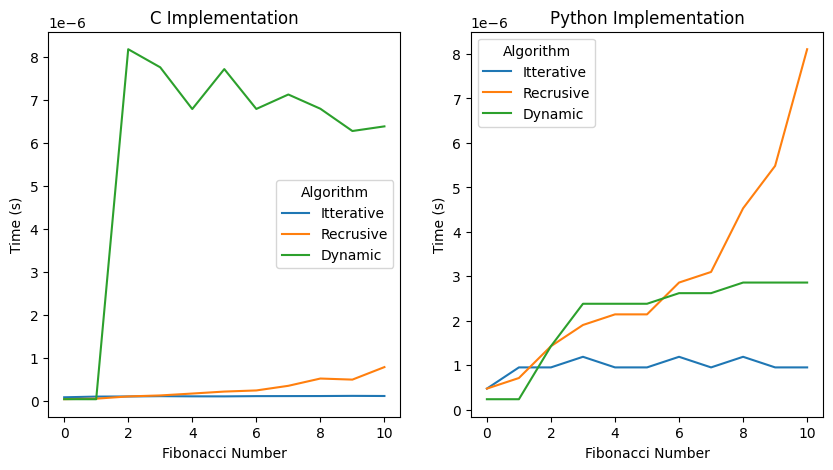

In [76]:
#read in results
c_df = pd.read_csv("results/c_fib_results.csv")
py_df = pd.read_csv("results/python_fib_results.csv")

c_df["Fibonacci Number"] = c_df.index
py_df["Fibonacci Number"] = py_df.index
c_df["Program"] = "C"
py_df["Program"] = "Python"

df = pd.concat([c_df, py_df])
df = df.melt(id_vars=["Program", "Fibonacci Number"], var_name="Algorithm", value_name="Time (s)")

c_df = df[df["Program"] == "C"]
py_df = df[df["Program"] == "Python"]



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.lineplot(x=c_df["Fibonacci Number"], y=c_df["Time (s)"], hue=df["Algorithm"], ax=axes[0])
axes[0].set_title("C Implementation")
axes[0].set_ylabel("Time (s)")
axes[0].set_xlabel("Fibonacci Number")

sns.lineplot(x=py_df["Fibonacci Number"], y=py_df["Time (s)"], hue=df["Algorithm"], ax=axes[1])
axes[1].set_title("Python Implementation")
axes[1].set_ylabel("Time (s)")
axes[1].set_xlabel("Fibonacci Number")

In [70]:
c_df

,Fibonacci Number,Itterative,Recrusive,Dynamic,,Program
0,0,8.600000e-08,4.100000e-08,4.200000e-08,C,C
1,1,1.020000e-07,5.300000e-08,4.100000e-08,C,C
2,2,1.030000e-07,1.070000e-07,7.869000e-06,C,C
3,3,1.090000e-07,1.310000e-07,6.710000e-06,C,C
4,4,1.060000e-07,1.760000e-07,7.117000e-06,C,C
5,5,1.100000e-07,2.100000e-07,6.842000e-06,C,C
6,6,1.100000e-07,2.920000e-07,6.689000e-06,C,C
7,7,1.130000e-07,3.700000e-07,6.418000e-06,C,C
8,8,1.210000e-07,6.220000e-07,6.965000e-06,C,C
9,9,1.180000e-07,6.740000e-07,7.415000e-06,C,C


In [ ]:
df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Itterative", "Recrusive", "Dynamic"]
                  )
df["Fibonacci Number"] = df["Fibonacci Number"].astype(str)
df[["Itterative", "Recrusive", "Dynamic"]] = df[["Itterative", "Recrusive", "Dynamic"]].astype(float)
df.to_csv("c_fib_results.csv", index=False)

,Fibonacci Number,Itterative,Recrusive,Dynamic
0,f_0,8.800000e-08,4.200000e-08,4.300000e-08
1,f_1,9.900000e-08,5.600000e-08,4.100000e-08
2,f_2,1.150000e-07,1.070000e-07,6.617000e-06
3,f_3,1.050000e-07,1.310000e-07,6.049000e-06
4,f_4,1.090000e-07,1.760000e-07,7.201000e-06
5,f_5,1.090000e-07,2.110000e-07,6.590000e-06
6,f_6,1.080000e-07,3.130000e-07,5.846000e-06
7,f_7,1.140000e-07,4.170000e-07,8.061000e-06
8,f_8,1.150000e-07,4.260000e-07,6.380000e-06
9,f_9,1.120000e-07,5.570000e-07,6.361000e-06
